In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [40]:
datajobsUK = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United Kingdom')].copy()



In [67]:
datajobsUK

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
152,Data Scientist,Data Science Team Lead,Anywhere,via OnlyDataJobs,Full-time,True,United Kingdom,2023-12-23 13:12:16,False,False,United Kingdom,None,NaN,NaN,StepStone Group,"[react, docker]","{'libraries': ['react'], 'other': ['docker']}"
280,Data Scientist,Data Scientist - Autonomy Dependability,"Porton Down, Salisbury, UK",via WJHL Jobs,Full-time,False,United Kingdom,2023-07-20 13:15:45,False,False,United Kingdom,None,NaN,NaN,DEFENCE SCIENCE AND TECHNOLOGY LABORATORY,None,None
400,Data Scientist,Data Scientist - Business Analytics - Chase,"London, UK",via KSNT Jobs,Full-time,False,United Kingdom,2023-08-21 13:15:46,False,False,United Kingdom,None,NaN,NaN,Jobleads-UK,"[sql, python]","{'programming': ['sql', 'python']}"
491,Data Scientist,Data Scientist,United Kingdom,via LinkedIn,Full-time,False,United Kingdom,2023-10-19 13:36:47,False,False,United Kingdom,None,NaN,NaN,MRJ Recruitment,"[sql, python]","{'programming': ['sql', 'python']}"
636,Data Scientist,Data Scientist - Pricing analyst,United Kingdom,via Careermap,Full-time,False,United Kingdom,2023-01-24 13:17:10,False,False,United Kingdom,None,NaN,NaN,Careermap,"[python, r, sql]","{'programming': ['python', 'r', 'sql']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784351,Data Scientist,MSc in Geo-Energy with Machine Learning and Da...,"London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:29,False,False,United Kingdom,None,NaN,NaN,Earthworks,None,None
784635,Data Scientist,Data Scientist,"London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:17,False,False,United Kingdom,None,NaN,NaN,Humanity,"[python, java, scala]","{'programming': ['python', 'java', 'scala']}"
784804,Data Scientist,Lead Data Scientist,"London, UK",via LinkedIn,Full-time,False,United Kingdom,2023-07-22 06:16:02,False,False,United Kingdom,None,NaN,NaN,Harnham,[python],{'programming': ['python']}
784963,Data Scientist,"Product Data Scientist, Bitcoin Wallet","London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:23,False,False,United Kingdom,None,NaN,NaN,Verse,"[python, r, sql, go, looker, tableau]","{'analyst_tools': ['looker', 'tableau'], 'prog..."


In [53]:
datajobsUK

datajobsUK["job_work_from_home"].value_counts()

job_work_from_home
False    8340
True      808
Name: count, dtype: int64

In [8]:
dataframeUK = datajobsUK["job_location"].value_counts().head(10).to_frame()

dataframeUK

,count
job_location,
"London, UK",45
United Kingdom,13
"Cambridge, UK",4
Anywhere,2
"Edinburgh, UK",2
"Hull, UK",2
"Little Chesterford, Saffron Walden, UK",1
"Reigate, UK",1
"Belfast, UK",1


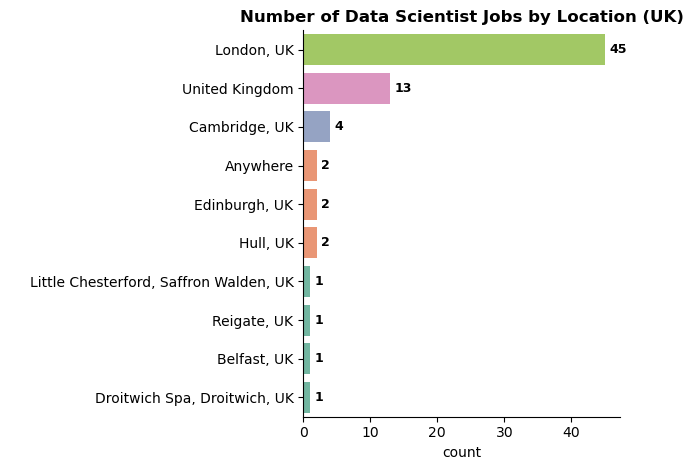

In [26]:
ax = sns.barplot(data = dataframeUK, x = "count", y = "job_location", hue = 'count', palette = "Set2", legend = False)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9, color='black', weight='bold')
sns.despine()
plt.title("Number of Data Scientist Jobs by Location (UK)", weight = "bold")
plt.ylabel(" ")
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

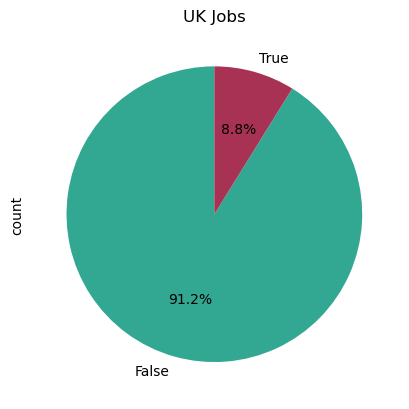

In [58]:
colours = ["#32a893", "#a83254"]
datajobsUK["job_work_from_home"].value_counts().plot(kind="pie", startangle = 90, autopct='%1.1f%%', colors = colours)
plt.title("UK Jobs")
plt.tight_layout

IndexError: index 2 is out of bounds for axis 0 with size 2

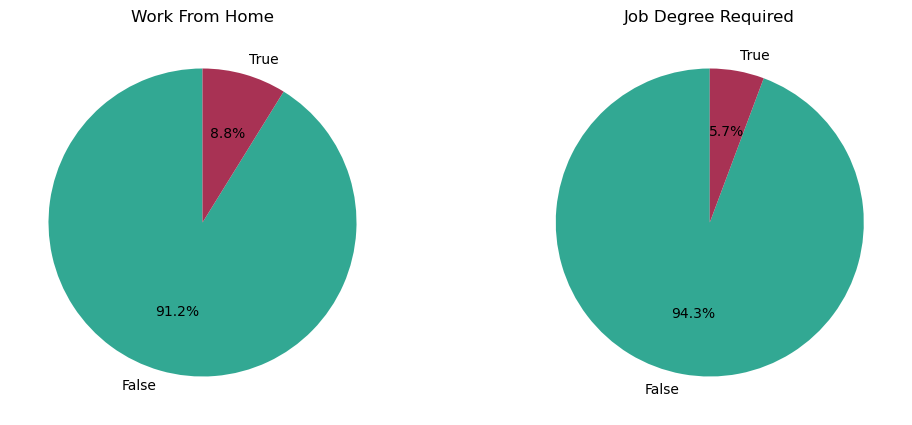

In [ ]:
fig, ax = plt.subplots(1,2)


dict_column = {
        "job_work_from_home": "Work From Home",
        "job_no_degree_mention": "Job Degree Required",
}
fig.set_size_inches((12,5))
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(datajobsUK[column].value_counts(), startangle = 90, autopct='%1.1f%%', colors = colours, labels = ["False", "True"])
    ax[i].set_title(title)
    
fig.tight_layout()
plt.show()
    

In [61]:
dataframeUK2 = datajobsUK["company_name"].value_counts().head(10).to_frame()

dataframeUK2


,count
company_name,
Harnham,416
Jobleads-UK,188
ClickJobs.io,136
Xcede,84
Harnham - Data & Analytics Recruitment,69
CareerAddict,67
Natwest,55
Understanding Recruitment,51
myGwork,49


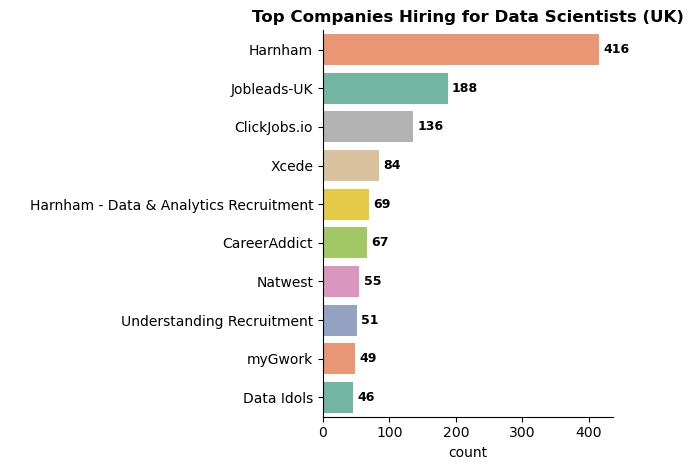

In [66]:
ax = sns.barplot(data = dataframeUK2, x = "count", y = "company_name", hue = 'count', palette = "Set2", legend = False)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9, color='black', weight='bold')
sns.despine()
plt.title("Top Companies Hiring for Data Scientists (UK)", weight = "bold")
plt.ylabel(" ")
plt.tight_layout()

In [70]:
dataframeUK3 = datajobsUK["job_via"].value_counts().head(10).to_frame()

dataframeUK3

,count
job_via,
via LinkedIn,3111
via BeBee,1197
via Recruit.net,574
via Indeed,454
via Totaljobs,242
via WJHL Jobs,235
via My ArkLaMiss Jobs,204
via WANE Jobs,156
via My Stateline Jobs,119


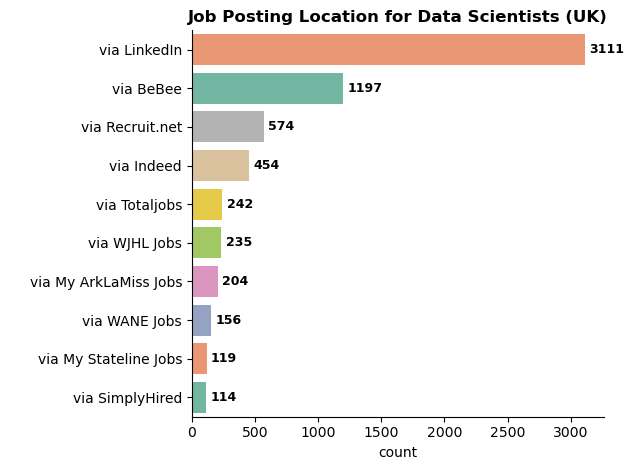

In [72]:
ax = sns.barplot(data = dataframeUK3, x = "count", y = "job_via", hue = 'count', palette = "Set2", legend = False)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9, color='black', weight='bold')
sns.despine()
plt.title("Job Posting Location for Data Scientists (UK)", weight = "bold")
plt.ylabel(" ")
plt.tight_layout()